# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Parte 1

### _Setup_ da parte 1

In [2]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [3]:
# Sua análise da parte 1 começa aqui.
# Verifica o tamanho do dataframe
dataframe.shape

(10000, 2)

In [4]:
# verifica os valores estatísticos das duas distribuições
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
normal,10000.0,19.991456,4.013850,4.310399,17.309638,19.98962,22.684324,35.704951
binomial,10000.0,20.097000,4.041191,6.000000,17.000000,20.00000,23.000000,36.000000


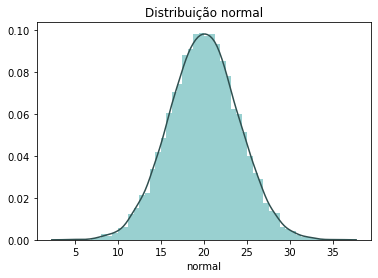

In [5]:
# plota a distribuição normal
fig, ax = plt.subplots()
sns.distplot(dataframe.normal, hist_kws={'color': 'darkcyan'}, kde_kws={'color': 'darkslategray'})
ax.set_title("Distribuição normal")
plt.show()

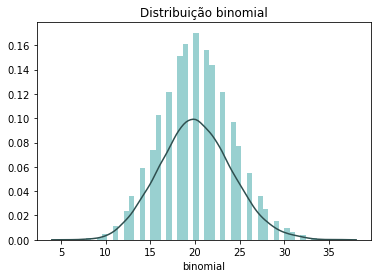

In [6]:
# plota a distribuição binomial
fig, ax = plt.subplots()
sns.distplot(dataframe.binomial, hist_kws={'color': 'darkcyan'}, kde_kws={'color': 'darkslategray'})
ax.set_title("Distribuição binomial")
plt.show()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [7]:
def q1():
    # calcula a diferença entre o valor do 1, 2 e 3 quantil da função normal e binomial
    q1 = dataframe.normal.quantile(0.25) - dataframe.binomial.quantile(0.25)
    q2 = dataframe.normal.quantile(0.5) - dataframe.binomial.quantile(0.5)
    q3 = dataframe.normal.quantile(0.75) - dataframe.binomial.quantile(0.75)
    answer = (round(q1,3), round(q2,3), round(q3,3))
    return answer

In [8]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [9]:
def q2():
    # calcula da média, desvio padrão e intervalos superior e inferior
    mean = dataframe.normal.mean()
    std = dataframe.normal.std()
    upper_limit = mean + std
    bottom_limit = mean - std

    # retorna a função de distribuição cumulativa
    normal = ECDF(dataframe.normal)

    # calcula a função cumulativa nos intervalos e determina probabilidade do intervalo
    answer = float(round(normal(upper_limit) - normal(bottom_limit),3))
    return answer

In [10]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [11]:
def q3():
    # calcula a diferença entre a média e variância das distribuições binomial e normal
    mean = dataframe.binomial.mean() - dataframe.normal.mean()
    variance = dataframe.binomial.var() - dataframe.normal.var()
    answer = (round(mean,3), round(variance,3))
    return answer

In [12]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [13]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [14]:
# Sua análise da parte 2 começa aqui.
# verifica as primeiras linhas do dataset
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [15]:
# verifica os dados estatístico do dataset
stars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_profile,17897.0,111.078321,25.652705,5.812500,100.929688,115.078125,127.085938,192.617188
sd_profile,17897.0,46.549021,6.843040,24.772042,42.375426,46.946435,51.022887,98.778911
kurt_profile,17897.0,0.477897,1.064056,-1.876011,0.027108,0.223241,0.473349,8.069522
skew_profile,17897.0,1.770417,6.168058,-1.791886,-0.188528,0.198736,0.928206,68.101622
mean_curve,17897.0,12.614926,29.473637,0.213211,1.923077,2.801839,5.464883,223.392140
sd_curve,17897.0,26.326918,19.471042,7.370432,14.437330,18.459977,28.428152,110.642211
kurt_curve,17897.0,8.303574,4.506217,-3.139270,5.781485,8.433872,10.702973,34.539844
skew_curve,17897.0,104.859419,106.517270,-1.976976,34.957119,83.068996,139.310905,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [16]:
def q4():
    # filtra somente os valores de target igual a 0
    mean_profile = stars.mean_profile.loc[stars.target == 0] 
    # normaliza os dados com média 0 e variância 1 utilizando função z-score  
    false_pulsar_mean_profile_standardized = (mean_profile - mean_profile.mean()) / mean_profile.std()

    # calcula a função de ponto percentual
    quantil_80, quantil_90,quantil_95 = sct.norm.ppf([0.8, 0.9,0.95],loc= 0, scale= 1)

    # calcula a função de distribuição normal para a série normalizada
    normal = ECDF(false_pulsar_mean_profile_standardized)

    answer = (round(normal(quantil_80),3), round(normal(quantil_90),3), round(normal(quantil_95),3))

    return answer

In [17]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [18]:
def q5():
    # filtra somente os valores de target igual a 0
    mean_profile = stars.mean_profile.loc[stars.target == 0] 
    # normaliza os dados com média 0 e variância 1 utilizando função z-score  
    false_pulsar_mean_profile_standardized = (mean_profile - mean_profile.mean()) / mean_profile.std()

    # calcula a diferença entre o quantil da série false_pulsar... e o quantil teórico de uma distribuição normal
    q1 = false_pulsar_mean_profile_standardized.quantile(0.25) - sct.norm.ppf(0.25)
    q2 = false_pulsar_mean_profile_standardized.quantile(0.5) - sct.norm.ppf(0.5)
    q3 = false_pulsar_mean_profile_standardized.quantile(0.75) - sct.norm.ppf(0.75)

    answer = (round(q1,3), round(q2,3), round(q3,3))
    return answer

In [19]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.